## Social Media analysis of top Influencers in Gaza
We import data from instagram using the [APIFY website](https://console.apify.com) by passing the names of the four chosen influencers for our study, which are [Moataz](https://www.instagram.com/motaz_azaiza/), [Bysan](https://www.instagram.com/wizard_bisan1/), [Ahmed](https://www.instagram.com/ahmedhijazee/), and [Saleh](https://www.instagram.com/saleh_aljafarawi/). 
Data downloaded was totally in raw, we refine it by chosing the most important information for this little study. Our Objective from this study is to trace the evolution of the interactions during the war period. furthermore, we highlight the effects of temporary ceasefire on the global post and interactions. Moreover, our analisys include the skipped videos and not watched during different periods. 

#### Pre-processing of the Data

In [ ]:
## Import all the packages 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator
import pandas as pd
from datetime import datetime
import plotly.io as pio
import kaleido
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
import plotly.graph_objs as go
import geopandas as gpd
import matplotlib.patches as mpatches
import seaborn as sns


In [1]:
file_path = 'gaza.xlsx' ## Gaza file comports data in different sheet for each influencer

xls = pd.ExcelFile(file_path)
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}
# Access each DataFrame by its sheet name and  Create DataFrames with sheet names as variable names from the global environment
for sheet_name, df in dfs.items():
    globals()[sheet_name] = df  

In [2]:
## Turn timestamp column to datetime
saleh["timestamp"] = saleh["timestamp"].apply(lambda _: datetime.strptime(_,"%Y-%m-%dT%H:%M:%S.%fZ"))
moataz["timestamp"] = moataz["timestamp"].apply(lambda _: datetime.strptime(_,"%Y-%m-%dT%H:%M:%S.%fZ"))
bysan["timestamp"] = bysan["timestamp"].apply(lambda _: datetime.strptime(_,"%Y-%m-%dT%H:%M:%S.%fZ"))
ahmed["timestamp"] = ahmed["timestamp"].apply(lambda _: datetime.strptime(_,"%Y-%m-%dT%H:%M:%S.%fZ"))

In [3]:
## For making the sum of publications we assess the number of similar dates between Saleh and Bysan 
### You can try the other tests by changing the names with Moataz or Ahmed etc ...
# Convert the columns to lists for comparison
saleh_timestamp_list = saleh['timestamp'].tolist()
ahmed_timestamp_list = bysan['timestamp'].tolist()

# Count the number of similar values
similar_values_count = sum(x == y for x, y in zip(saleh_timestamp_list, ahmed_timestamp_list))

print(f"The number of similar values between the columns is: {similar_values_count}")


The number of similar values between the columns is: 0


In [4]:
merged_df = pd.merge(saleh, ahmed, on=list(ahmed.columns), how='outer')
merged_df = pd.merge(merged_df, moataz, on=list(ahmed.columns), how='outer')
merged_df = pd.merge(merged_df, bysan, on=list(ahmed.columns), how='outer')

In [5]:
## Adjusting the data to the post of the events of 7th of October, which represent the main event

df_saleh_tr = saleh[["timestamp", "totalreactions"]]

# Group by date and sum the values
df_saleh_tr['timestamp'] = pd.to_datetime(df_saleh_tr['timestamp']).dt.date
df_saleh_tr = df_saleh_tr.groupby('timestamp')['totalreactions'].agg(['sum', 'count']).reset_index()
df_saleh_tr.columns = ['date', 'sum', 'count']

# Sort the DataFrame by 'date'
df_saleh_tr['date'] = pd.to_datetime(df_saleh_tr['date'])
df_saleh_tr = df_saleh_tr.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_saleh_tr['date'] >= pd.to_datetime('2023-10-07')
filtered_data = df_saleh_tr[condition]

filtered_data.columns = ["date", "saleh", "saleh_count"]
filtered_data["saleh"] = filtered_data["saleh"] / 1000

df_moataz_tr = moataz[["timestamp", "totalreactions"]]

# Group by date and sum the values
df_moataz_tr['timestamp'] = pd.to_datetime(df_moataz_tr['timestamp']).dt.date
df_moataz_tr = df_moataz_tr.groupby('timestamp')['totalreactions'].agg(['sum', 'count']).reset_index()
df_moataz_tr.columns = ['date', 'sum', 'count']

# Sort the DataFrame by 'date'
df_moataz_tr['date'] = pd.to_datetime(df_moataz_tr['date'])
df_moataz_tr = df_moataz_tr.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_moataz_tr['date'] >= pd.to_datetime('2023-10-07')
filtered_data1 = df_moataz_tr[condition]

filtered_data1.columns = ["date", "moataz", "moataz_count"]
filtered_data1["moataz"] = filtered_data1["moataz"] / 1000

df_ahmed_tr = ahmed[["timestamp", "totalreactions"]]

# Group by date and sum the values
df_ahmed_tr['timestamp'] = pd.to_datetime(df_ahmed_tr['timestamp']).dt.date
df_ahmed_tr = df_ahmed_tr.groupby('timestamp')['totalreactions'].agg(['sum', 'count']).reset_index()
df_ahmed_tr.columns = ['date', 'sum', 'count']

# Sort the DataFrame by 'date'
df_ahmed_tr['date'] = pd.to_datetime(df_ahmed_tr['date'])
df_ahmed_tr = df_ahmed_tr.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_ahmed_tr['date'] >= pd.to_datetime('2023-10-07')
filtered_data2 = df_ahmed_tr[condition]

filtered_data2.columns = ["date", "ahmed", "ahmed_count"]
filtered_data2["ahmed"] = filtered_data2["ahmed"] / 1000

df_bysan_tr = bysan[["timestamp", "totalreactions"]]

# Group by date and sum the values
df_bysan_tr['timestamp'] = pd.to_datetime(df_bysan_tr['timestamp']).dt.date
df_bysan_tr = df_bysan_tr.groupby('timestamp')['totalreactions'].agg(['sum', 'count']).reset_index()
df_bysan_tr.columns = ['date', 'sum', 'count']

# Sort the DataFrame by 'date'
df_bysan_tr['date'] = pd.to_datetime(df_bysan_tr['date'])
df_bysan_tr = df_bysan_tr.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_bysan_tr['date'] >= pd.to_datetime('2023-10-07')
filtered_data3 = df_bysan_tr[condition]

filtered_data3.columns = ["date", "bysan", "bysan_count"]
filtered_data3["bysan"] = filtered_data3["bysan"] / 1000

C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\2505585733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleh_tr['timestamp'] = pd.to_datetime(df_saleh_tr['timestamp']).dt.date
C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\2505585733.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["saleh"] = filtered_data["saleh"] / 1000
C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\2505585733.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [24]:
### Merge the data into a list of dataframes
condition = df_bysan_tr['date'] >= pd.to_datetime('2023-10-07')
df_bysan_tr = df_bysan_tr[condition]
condition = df_saleh_tr['date'] >= pd.to_datetime('2023-10-07')
df_saleh_tr = df_saleh_tr[condition]
condition = df_moataz_tr['date'] >= pd.to_datetime('2023-10-07')
df_moataz_tr = df_moataz_tr[condition]
condition = df_ahmed_tr['date'] >= pd.to_datetime('2023-10-07')
df_ahmed_tr = df_ahmed_tr[condition]
dfs_filtered = [filtered_data[["date", "saleh"]], filtered_data1[["date", "moataz"]], filtered_data2[["date", "ahmed"]], 
       filtered_data3[["date", "bysan"]]]
dfs = [df_saleh_tr[["date", "sum"]], df_moataz_tr[["date", "sum"]], df_ahmed_tr[["date", "sum"]], df_bysan_tr[["date", "sum"]]]

In [7]:
to_sum = pd.merge(dfs[0], dfs[1], on='date', how='outer')
to_sum = pd.merge(to_sum, dfs[2], on='date', how='outer')
to_sum = pd.merge(to_sum, dfs[3], on='date', how='outer')
to_sum['sum_last_four'] = to_sum.iloc[:, 1:].sum(axis=1, skipna=True)
to_sum = to_sum[['date', 'sum_last_four']]
to_sum.columns = ['date', 'sum']

to_sum = to_sum.sort_values(by='date')
dfs.append(to_sum)

C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\1036157167.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'sum_x'} in the result is deprecated and will raise a MergeError in a future version.
  to_sum = pd.merge(to_sum, dfs[3], on='date', how='outer')


In [8]:
### To calculate the views per play or click(hit), we select from the main dataframes 
df_saleh_ahit = saleh[["timestamp", "videoViewCount", "videoPlayCount"]]

# Group by date and sum the values
df_saleh_ahit['timestamp'] = pd.to_datetime(df_saleh_ahit['timestamp']).dt.date
df_saleh_ahit['average_hit'] = df_saleh_ahit["videoViewCount"] / df_saleh_ahit["videoPlayCount"]
df_saleh_ahit = df_saleh_ahit.groupby('timestamp')['average_hit'].agg(['mean', 'count']).reset_index()
df_saleh_ahit.columns = ['date', 'mean', 'count']

# Sort the DataFrame by 'date'
df_saleh_ahit['date'] = pd.to_datetime(df_saleh_ahit['date'])
df_saleh_ahit = df_saleh_ahit.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_saleh_ahit['date'] >= pd.to_datetime('2023-10-07')
filtered_data_ahit = df_saleh_ahit[condition]

filtered_data_ahit.columns = ["date", "saleh", "saleh_count"]
filtered_data_ahit["saleh"] = filtered_data_ahit["saleh"]

df_moataz_ahit = moataz[["timestamp", "videoViewCount", "videoPlayCount"]]

# Group by date and sum the values
df_moataz_ahit['timestamp'] = pd.to_datetime(df_moataz_ahit['timestamp']).dt.date
df_moataz_ahit['average_hit'] = df_moataz_ahit["videoViewCount"] / df_moataz_ahit["videoPlayCount"]
df_moataz_ahit = df_moataz_ahit.groupby('timestamp')['average_hit'].agg(['mean', 'count']).reset_index()
df_moataz_ahit.columns = ['date', 'mean', 'count']

# Sort the DataFrame by 'date'
df_moataz_ahit['date'] = pd.to_datetime(df_moataz_ahit['date'])
df_moataz_ahit = df_moataz_ahit.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_moataz_ahit['date'] >= pd.to_datetime('2023-10-07')
filtered_data_ahit1 = df_moataz_ahit[condition]

filtered_data_ahit1.columns = ["date", "moataz", "moataz_count"]
filtered_data_ahit1["moataz"] = filtered_data_ahit1["moataz"]

df_ahmed_ahit = ahmed[["timestamp", "videoViewCount", "videoPlayCount"]]

# Group by date and sum the values
df_ahmed_ahit['timestamp'] = pd.to_datetime(df_ahmed_ahit['timestamp']).dt.date
df_ahmed_ahit['average_hit'] = df_ahmed_ahit["videoViewCount"] / df_ahmed_ahit["videoPlayCount"]
df_ahmed_ahit = df_ahmed_ahit.groupby('timestamp')['average_hit'].agg(['mean', 'count']).reset_index()
df_ahmed_ahit.columns = ['date', 'mean', 'count']

# Sort the DataFrame by 'date'
df_ahmed_ahit['date'] = pd.to_datetime(df_ahmed_ahit['date'])
df_ahmed_ahit = df_ahmed_ahit.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_ahmed_ahit['date'] >= pd.to_datetime('2023-10-07')
filtered_data_ahit2 = df_ahmed_ahit[condition]

filtered_data_ahit2.columns = ["date", "ahmed", "ahmed_count"]
filtered_data_ahit2["ahmed"] = filtered_data_ahit2["ahmed"]


df_bysan_ahit = bysan[["timestamp", "videoViewCount", "videoPlayCount"]]

# Group by date and sum the values
df_bysan_ahit['timestamp'] = pd.to_datetime(df_bysan_ahit['timestamp']).dt.date
df_bysan_ahit['average_hit'] = df_bysan_ahit["videoViewCount"] / df_bysan_ahit["videoPlayCount"]
df_bysan_ahit = df_bysan_ahit.groupby('timestamp')['average_hit'].agg(['mean', 'count']).reset_index()
df_bysan_ahit.columns = ['date', 'mean', 'count']

# Sort the DataFrame by 'date'
df_bysan_ahit['date'] = pd.to_datetime(df_bysan_ahit['date'])
df_bysan_ahit = df_bysan_ahit.sort_values('date')

# Filter data to retain entries from October 7, 2023, onwards
condition = df_bysan_ahit['date'] >= pd.to_datetime('2023-10-07')
filtered_data_ahit3 = df_bysan_ahit[condition]

filtered_data_ahit3.columns = ["date", "bysan", "bysan_count"]
filtered_data_ahit3["bysan"] = filtered_data_ahit3["bysan"]

C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\2354149008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleh_ahit['timestamp'] = pd.to_datetime(df_saleh_ahit['timestamp']).dt.date
C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\2354149008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleh_ahit['average_hit'] = df_saleh_ahit["videoViewCount"] / df_saleh_ahit["videoPlayCount"]
C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\2354149008.py:18: SettingWithCopyWarning: 
A value is tryin

In [9]:
### Make a list of dataframes for the play per click
condition = df_bysan_ahit['date'] >= pd.to_datetime('2023-10-07')
df_bysan_ahit = df_bysan_ahit[condition]
condition = df_saleh_ahit['date'] >= pd.to_datetime('2023-10-07')
df_saleh_ahit = df_saleh_ahit[condition]
condition = df_moataz_ahit['date'] >= pd.to_datetime('2023-10-07')
df_moataz_ahit = df_moataz_ahit[condition]
condition = df_ahmed_ahit['date'] >= pd.to_datetime('2023-10-07')
df_ahmed_ahit = df_ahmed_ahit[condition]
dfs_filtered_hit = [filtered_data_ahit[["date", "saleh"]], filtered_data_ahit1[["date", "moataz"]], filtered_data_ahit2[["date", "ahmed"]], 
       filtered_data_ahit3[["date", "bysan"]]]
dfs_hit = [df_saleh_ahit[["date", "mean"]], df_moataz_ahit[["date", "mean"]], df_ahmed_ahit[["date", "mean"]], df_bysan_ahit[["date", "mean"]]]

In [10]:
### Calculate the Mean for all the Influencers of global view per click
to_mean = pd.merge(dfs_hit[0], dfs_hit[1], on='date', how='outer')
to_mean = pd.merge(to_mean, dfs_hit[2], on='date', how='outer')
to_mean = pd.merge(to_mean, dfs_hit[3], on='date', how='outer')
to_mean['mean_last_four'] = to_mean.iloc[:, 1:].mean(axis=1, skipna=True)
to_mean = to_mean[['date', 'mean_last_four']]
to_mean.columns = ['date', 'mean']

to_mean = to_mean.sort_values(by='date')
dfs_hit.append(to_mean)

C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\2433116585.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_x'} in the result is deprecated and will raise a MergeError in a future version.
  to_mean = pd.merge(to_mean, dfs_hit[3], on='date', how='outer')


### The bar plot for the number of publication per category during the three periods

In [44]:
# Creating DataFrame
df = merged_df[["timestamp", "type", "videoDuration"]]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df[df['timestamp'] >= '2023-10-07']

# Sorting dataframes by timestamp
df = df.sort_values(by='timestamp')

# Categorizing periods
df['period'] = pd.cut(
    df['timestamp'],
    bins=[pd.Timestamp.min, pd.Timestamp('2023-11-24'), pd.Timestamp('2023-11-30'), pd.Timestamp.max],
    labels=['Before Truce', 'During Truce', 'After Truce']
)

# Grouping by 'type' and counting the number of publications for each type for different periods
type_counts = df.groupby(['type', 'period']).size().reset_index(name='count')
color_map = {'Video': '#606c38', 'Sidecar': '#fefae0', 'Image': '#bc6c25'}

# Creating a color map for video durations
video_colors = px.colors.sequential.Viridis

# Plotting with Plotly Express for different periods
fig = px.bar(type_counts, x='type', y='count', color='type', facet_col='period',
             labels={'count': 'Number of Publications', 'type': 'Type'},
             category_orders={'type': ['Video', 'Sidecar', 'Image']},
             color_discrete_map=color_map
            )
fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.7)

fig.update_layout(
    title='Total Post Per Category',
    yaxis=dict(title='Total posts', tickfont=dict(size=16, family='Arial')),  # Customize y-axis tick font
    font=dict(family='Fredoka One', size=21, color='white'),  # Change font family, size, and color for the entire plot
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0.7)',  # Adjust the background color's transparency
    paper_bgcolor='rgba(0, 0, 0, 0.5)',  # Adjust the plot area's background color's transparency
    #font=dict(color='white')  # Change font color to white for better contrast
)

# Remove x-axis for each subplot
fig.update_xaxes(visible=False)

pio.write_image(fig, "bar_plot.jpeg", width=1200, height=600)
fig.show()

C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\1787954471.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### The bar plot for the number of publication per category during two periods
#### Line Plot for the duration od the videos evolution per time

In [50]:
# Creating DataFrame
df = merged_df[["timestamp", "type", "videoDuration"]]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df[df['timestamp'] >= '2023-10-07']


# Sorting dataframes by timestamp
df = df.sort_values(by='timestamp')

# Grouping by 'type' and counting the number of publications for each type for both periods
df['period'] = df['timestamp'].apply(lambda x: 'Before 2023-11-24' if x < pd.Timestamp('2023-11-24') else 'After 2023-11-24')
type_counts = df.groupby(['type', 'period']).size().reset_index(name='count')

# Creating a color map for video durations
video_colors = px.colors.sequential.Viridis

# Plotting with Plotly Express
fig = px.bar(type_counts, x='type', y='count', color='type', facet_col='period',
             labels={'count': 'Number of Publications', 'type': 'Type'},
             category_orders={'type': ['Video', 'Sidecar', 'Image']},
             color_discrete_map={'Video': [video_colors[int(i * (len(video_colors) - 1))] for i in 
                                          df[df['type'] == 'Video']['videoDuration'].rank(pct=True)]}
            )
fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.7)
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0.7)',  # Adjust the background color's transparency
    paper_bgcolor='rgba(0, 0, 0, 0.5)',  # Adjust the plot area's background color's transparency
    font=dict(color='white')  # Change font color to white for better contrast
)
#pio.write_image(fig, "bar_plot.jpeg")


line_fig = px.line(df.dropna(subset=['videoDuration']), x='timestamp', y='videoDuration')
line_fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.7, line=dict(color = '#dda15e'))
line_fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0.7)',  # Adjust the background color's transparency
    paper_bgcolor='rgba(0, 0, 0, 0.5)',  # Adjust the plot area's background color's transparency
    font=dict(color='white', size = 18)  # Change font color to white for better contrast
)
pio.write_image(line_fig, "line_plot.jpeg", width= 800, height=300)


# Show plot
fig.show()
line_fig.show(height = 100, width = 50)


C:\Users\alitr\AppData\Local\Temp\ipykernel_13704\411597981.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### The distribution of the average view per click

In [51]:
### The calculation of the averages before, after and in the Truce, and the total average for the view per click
bar_list = []
for  idx, df in enumerate(dfs_hit): 
    avg_before = dfs_hit[idx][dfs_hit[idx]['date'] < '2023-11-24']['mean'].mean(skipna = True)
    avg_between = dfs_hit[idx][(dfs_hit[idx]['date'] >= '2023-11-24') & (dfs_hit[idx]['date'] <= '2023-11-30')]['mean'].mean(skipna = True)
    avg_after = dfs_hit[idx][dfs_hit[idx]['date'] > '2023-11-30']['mean'].mean(skipna = True)
    avg_before, avg_between, avg_after = (0 if np.isnan(v) else v for v in (avg_before, avg_between, avg_after))
    bar_list.append([avg_before, avg_between, avg_after])

In [58]:

periods = ['Before Truce', 'During Truce', 'After Truce']
names_bar = ['Saleh', 'Moataz', 'Ahmed', 'Bysan', 'Total']
colors = ['#606c38', '#283618', '#fefae0', '#dda15e', '#bc6c25']

fig = go.Figure()

for i, bars in enumerate(bar_list):
    fig.add_trace(go.Bar(name=names_bar[i], x=periods, y=bars, marker=dict(color=colors[i])))

fig.update_layout(barmode='group',
                  xaxis=dict(title='Date', showgrid=False, tickangle=-25),  # Incline dates
                  yaxis=dict(title='Watching Video Per Play (%)'),
                  template='plotly_dark',
                  plot_bgcolor='rgba(0, 0, 0, 0.7)',  # Adjust the background color's transparency
                  paper_bgcolor='rgba(0, 0, 0, 0.5)',  # Adjust the plot area's background color's transparency
                  font=dict(color='white', size = 18))  # Change font color to white for better contrast)
fig.show()


#### A line plot for the number of interactions (likes and comments) for the post on instagram

In [62]:
fig = go.Figure()
traces = []
annotations = []

## add temporary truce to the figure
crisis_periods = [(pd.to_datetime('2023-11-24'), "Periodic ceasefire")]
for date, comment in crisis_periods:
    for df in dfs:
        if date in df['date'].values:
            y_value = df.loc[df['date'] == date, 'sum'].values[0]
            annotation = dict(x=date, y=y_value,
                              text=comment, showarrow=True, arrowhead=1, arrowwidth=2, arrowcolor='black',
                              xshift=5, yshift=5, font=dict(size=8), name=comment)
            annotations.append(annotation)
            break


colors = ['#606c38', '#283618', '#fefae0', '#dda15e', '#bc6c25']

for idx, df in enumerate(dfs):
    trace = go.Scatter(x=df['date'], y=df['sum'], mode='lines', name=f'hero {hero_names[idx]}', visible=False, line=dict(color=colors[idx]))
    traces.append(trace)
    fig.add_trace(trace)

fig.add_vrect(
    x0="2023-11-24", x1="2023-11-29",
    fillcolor="rgba(173, 216, 230, 0.3)",  
    layer="below", line_width=0,
)

# Update layout
fig.update_layout(
    title='Social Media interactions during war in Gaza',
    xaxis=dict(title='Date', showgrid=False, tickangle=-35, tickformat="%Y-%m-%d", tickfont=dict(size=12, family='Arial')),
    yaxis=dict(title='Total interaction (in thousands)', tickfont=dict(size=12, family='Arial')),  
    font=dict(family='Arial', size=18, color='white'),  
    #xaxis=dict(title='Date', showgrid=False, tickangle=-35, tickformat="%Y-%m-%d"),  # Incline dates
    #yaxis=dict(title='Total interaction (in thousands)'),
    #font_family="Outfit",
    #font_size = 13,
    template  = "plotly_dark",
    plot_bgcolor='rgba(0, 0, 0, 0.7)',  
    paper_bgcolor='rgba(0, 0, 0, 0.5)',  
    #font=dict(color='white'), 
    #plot_bgcolor='rgb(253,241,230)',
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [True if i == idx else False for i in range(len(traces))]}],
                         # {"annotations": [a if i == idx else {} for i, a in enumerate(annotations)]}],
                    label=f'Hero {hero_names[idx]}',
                    method="update"
                ) for idx in range(len(traces))  # Add options for each individual stock
            ] + [
                dict(
                    args=[{"visible": [True] * len(traces),
                           "annotations": annotations}],
                    label="All Heroes",
                    method="update"
                )
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.1,  # Move buttons to the right
            xanchor="right",
            y=1.15,
            yanchor="top"
        ),
    ]
)


fig.show()

#### A line plot for the percentage of video watching per click 

In [30]:
fig = go.Figure()
traces = []
annotations = []

## add temporary truce to the figure
crisis_periods = [(pd.to_datetime('2023-11-24'), "Periodic ceasefire")]
for date, comment in crisis_periods:
    for df in dfs:
        if date in df['date'].values:
            y_value = df.loc[df['date'] == date, 'sum'].values[0]
            annotation = dict(x=date, y=y_value,
                              text=comment, showarrow=True, arrowhead=1, arrowwidth=2, arrowcolor='black',
                              xshift=5, yshift=5, font=dict(size=8), name=comment)
            annotations.append(annotation)
            break  # Add annotation once for each crisis date

# Plot lines and store them with annotations
colors = ['#00BFFF', '#9B30FF', '#00FF00', '#006400']
for idx, df in enumerate(dfs):
    trace = go.Scatter(x=df['date'], y=df['sum'], mode='lines', name=f'hero {hero_names[idx]}', visible=False, line=dict(color=colors[idx]))
    traces.append(trace)
    fig.add_trace(trace)

fig.add_vrect(
    x0="2023-11-24", x1="2023-11-29",
    fillcolor="rgba(173, 216, 230, 0.3)",  
    layer="below", line_width=0,
)

# Update layout and other configurations
fig.update_layout(
    title='Social Media interactions during war in Gaza',
    xaxis=dict(title='Date', showgrid=False, tickangle=-35, tickformat="%Y-%m-%d"),
    yaxis=dict(title='Total interaction (in thousands)'),
    font_family="Outfit",
    font_size=13,
    template="plotly_dark",
    updatemenus=[
        dict(
            buttons=[
                # Keep the visibility True for "All Heroes"
                dict(
                    args=[{"visible": [True] * len(traces),
                           "annotations": annotations}],
                    label="All Heroes",
                    method="update"
                )
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.1,
            xanchor="right",
            y=1.15,
            yanchor="top"
        ),
    ]
)

fig.show()


In [31]:
pio.write_image(fig, 'plot.jpg', format='jpeg')

In [60]:

fig = go.Figure()

traces = []
annotations = []

## add temporary truce to the figure
crisis_periods = [(pd.to_datetime('2023-11-24'), "Periodic ceasefire")]
for date, comment in crisis_periods:
    for df in dfs_hit:
        if date in df['date'].values:
            y_value = df.loc[df['date'] == date, 'mean'].values[0]
            annotation = dict(x=date, y=y_value,
                              text=comment, showarrow=True, arrowhead=1, arrowwidth=2, arrowcolor='black',
                              xshift=5, yshift=5, font=dict(size=8), name=comment)
            annotations.append(annotation)
            break

# Plot lines and store them with annotations
colors = ['#606c38', '#283618', '#fefae0', '#dda15e', '#bc6c25']
for idx, df in enumerate(dfs_hit):
    trace = go.Scatter(x=df['date'], y=df['mean'], mode='lines', name=f'hero {hero_names[idx]}', visible=False, line=dict(color=colors[idx]))
    traces.append(trace)
    fig.add_trace(trace)

fig.add_vrect(
    x0="2023-11-24", x1="2023-11-29",
    fillcolor="rgba(173, 216, 230, 0.3)", 
    layer="below", line_width=0,
)

# Update layout
fig.update_layout(
    title='Social Media interactions during war in Gaza',
    xaxis=dict(title='Date', showgrid=False, tickangle=-35, tickformat="%Y-%m-%d", tickfont=dict(size=10, family='Arial')), 
    yaxis=dict(title='Total interaction (percentage)', tickfont=dict(size=10, family='Arial')),  
    font=dict(family='Arial', size=26, color='white'), 
    #font_family="Outfit",
    #font_size = 13,
    template  = "plotly_dark",
    plot_bgcolor='rgba(0, 0, 0, 0.7)',  
    paper_bgcolor='rgba(0, 0, 0, 0.5)', 
    #font=dict(color='white'),  # Change font color to white for better contrast
    #plot_bgcolor='rgb(253,241,230)',
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [True if i == idx else False for i in range(len(traces))]}],
                         # {"annotations": [a if i == idx else {} for i, a in enumerate(annotations)]}],
                    label=f'Hero {hero_names[idx]}',
                    method="update"
                ) for idx in range(len(traces))  # Add options for each individual stock
            ] + [
                dict(
                    args=[{"visible": [True] * len(traces),
                           "annotations": annotations}],
                    label="All Heroes",
                    method="update"
                )
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.1, 
            xanchor="right",
            y=1.15,
            yanchor="top"
        ),
    ]
)


fig.show()

##### A Map plot with interactions for each contributors in pie plot

In [14]:
# Load the shapefile data containing the geographical boundaries of Gaza Strip regions
gaza_regions = gpd.read_file('GazaStrip_MunicipalBoundaries.shp')
gaza_regions.NAME.unique()

In [12]:
### Define a list of dataframes for the number of plots for each contributor
dfs_count = [df_saleh_tr[["date", "count"]], df_moataz_tr[["date", "count"]], df_ahmed_tr[["date", "count"]], df_bysan_tr[["date", "count"]]]

In [16]:
### Calculation of the contributors according to theri displacments

north  = []
south = []
middle = []
places_list = []
for  idx, df in enumerate(dfs_count): 
    avg_north = dfs_count[idx][dfs_count[idx]['date'] <= '2023-11-10']['count'].sum(skipna = True)
    north.append(avg_north)
    if (idx  == 0):
        avg_south_ands = dfs_count[idx][(dfs_count[idx]['date'] >= '2023-11-24') & (dfs_count[idx]['date'] <= '2023-12-1')]['count'].sum(skipna = True)
        south.append(avg_south_ands)
        avg_middle_ands2 = dfs_count[idx][(dfs_count[idx]['date'] > '2023-11-30')]['count'].sum(skipna = True)
        avg_middle_ands1 = dfs_count[idx][(dfs_count[idx]['date'] > '2023-11-10') & (dfs_count[idx]['date'] < '2023-11-26')]['count'].sum(skipna = True)

        avg_middle_mands = avg_middle_ands1 + avg_middle_ands2
        middle.append(avg_middle_mands)
    elif (idx  == 1):
        avg_south_mand = dfs_count[idx][(dfs_count[idx]['date'] >= '2023-11-24') & (dfs_count[idx]['date'] <= '2023-12-1')]['count'].sum(skipna = True)
        south.append(avg_south_mand)
        avg_middle_mand2 = dfs_count[idx][(dfs_count[idx]['date'] > '2023-12-1')]['count'].sum(skipna = True)
        avg_middle_mand1 = dfs_count[idx][(dfs_count[idx]['date'] > '2023-11-10') & (dfs_count[idx]['date'] < '2023-11-24')]['count'].sum(skipna = True)

        avg_middle_mands = avg_middle_mand1 + avg_middle_mand2
        middle.append(avg_middle_mands)
    else: 
        avg_middle_aandb = dfs_count[idx][(dfs_count[idx]['date'] > '2023-11-10') & (dfs_count[idx]['date'] <= '2023-11-24')]['count'].sum(skipna = True)
        middle.append(avg_middle_aandb)
        avg_middle_aandb = dfs_count[idx][(dfs_count[idx]['date'] > '2023-11-24')]['count'].sum(skipna = True)
        south.append(avg_middle_aandb)
    #avg_before, avg_between, avg_after = (0 if np.isnan(v) else v for v in (avg_before, avg_between, avg_after))
    #bar_list.append([avg_before, avg_between, avg_after])

In [17]:
### Calculate the total posts and average posts per region
places_list = [north, middle, south]
total_posts = []
for i in range(0, len(places_list)):
    avg = sum(places_list[i])
    total_posts.append(avg)

c:\Users\alitr\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:656: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



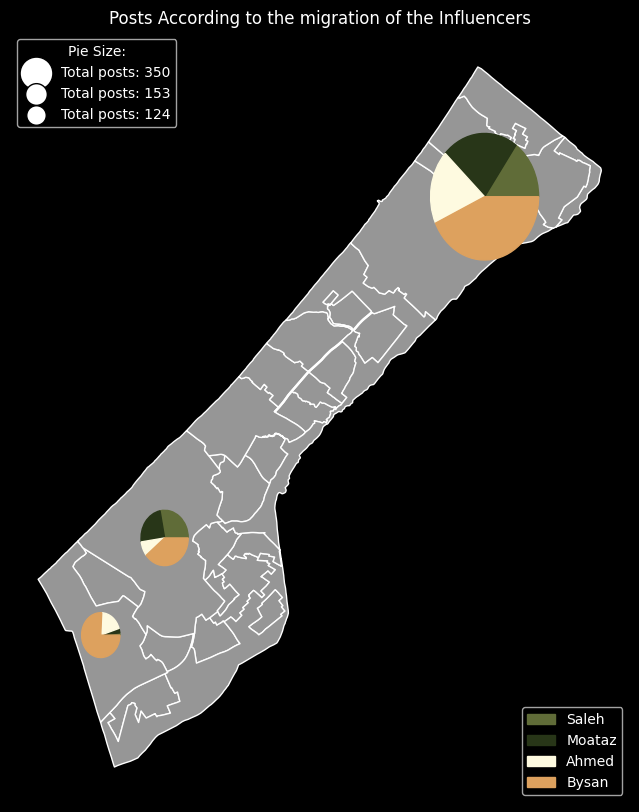

In [63]:
colors = ['#606c38', '#283618', '#fefae0', '#dda15e', '#bc6c25']


# Retrieve the geometries of the first three regions
regions_subset = gaza_regions[(gaza_regions["NAME"] == "Jabalya") | (gaza_regions["NAME"] == "Khan Yunis") | (gaza_regions["NAME"] == "Rafah")]
# Define the desired order of names
desired_order = ['Jabalya', 'Khan Yunis', 'Rafah']

# Set the 'NAME' column as the index temporarily for reordering
regions_subset.set_index('NAME', inplace=True)

# Reorder the DataFrame according to the desired order
regions_subset = regions_subset.loc[desired_order].reset_index()

# Reset the index to default (0, 1, 2, ...)
regions_subset.reset_index(drop=True, inplace=True)

# Calculate the total global population
total_global_population = sum(sum(region) for region in places_list)


# Plotting the entire map with a fully black background
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('black')  # Set the figure background to black

gaza_regions.plot(column='NAME', legend=True, ax=ax, color='#969696', edgecolor='white')

o = 0 
# Plot pie charts for kids and adults
for idx, row in regions_subset.iterrows():
    total_pop = sum(places_list[o])  # Total population
    sizes = [pop / total_pop for pop in places_list[o]]
    x, y = row.geometry.centroid.x, row.geometry.centroid.y

    # Calculate pie chart radius based on global population
    radius = (total_pop / total_global_population) * 0.06  # Adjust 0.4 to control the overall pie chart size
    
    # Draw pie chart wedges
    saleh_patch = mpatches.Wedge((x, y), radius, 0, sizes[0]*360, edgecolor='#606c38', facecolor='#606c38')
    moataz_patch = mpatches.Wedge((x, y), radius, sizes[0]*360, (sizes[0] + sizes[1])*360, edgecolor='#283618', facecolor='#283618')
    ahmed_patch = mpatches.Wedge((x, y), radius, (sizes[0] + sizes[1])*360, (sizes[0] + sizes[1] + sizes[2])*360, edgecolor='#fefae0', facecolor='#fefae0')
    bysan_patch = mpatches.Wedge((x, y), radius, (sizes[0] + sizes[1] + sizes[2])*360, 360, edgecolor='#dda15e', facecolor='#dda15e') 
    
    ax.add_patch(saleh_patch)
    ax.add_patch(moataz_patch)
    ax.add_patch(ahmed_patch)
    ax.add_patch(bysan_patch)
    o = o + 1

# Create proxy artists for the bubble sizes in legend
bubble_sizes = total_posts  
bubble_handles = [ax.scatter([], [], s=(size / total_global_population) * 1000, color='white', edgecolor='black', label=f'Total posts: {size}') for size in bubble_sizes]
legend1 = plt.legend(handles=bubble_handles, loc='upper left', title='Pie Size:')
ax.add_artist(legend1)

# Create legend handles for pie chart categories
saleh_patch = mpatches.Patch(color='#606c38', label='Saleh')
moataz_patch = mpatches.Patch(color='#283618', label='Moataz')
ahmed_patch = mpatches.Patch(color='#fefae0', label='Ahmed')
bysan_patch = mpatches.Patch(color='#dda15e', label='Bysan')

plt.legend(handles=[saleh_patch, moataz_patch, ahmed_patch, bysan_patch], loc='lower right')

plt.title('Posts According to the migration of the Influencers')
ax.set_axis_off()

plt.show()


### Other trial plots using pie chart and bubbles for the Map of Gaza

c:\Users\alitr\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:656: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



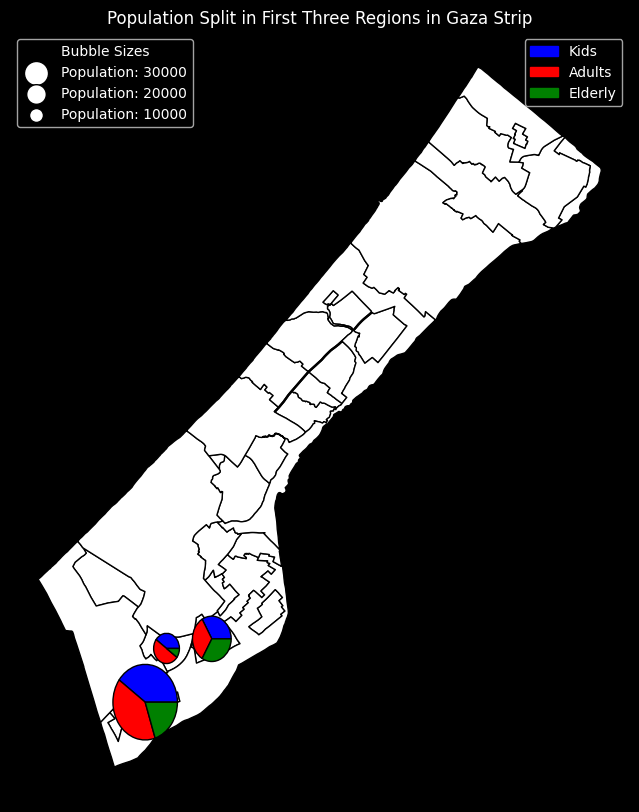

In [111]:

populations = [[20000, 20000, 10000], [8000, 10000, 2000], [10000, 10000, 10000]]
regions_subset = gaza_regions.iloc[:3]

total_global_population = sum(sum(region) for region in populations)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('black')

gaza_regions.plot(column='NAME', legend=True, ax=ax, color='white', edgecolor='black')

for idx, row in regions_subset.iterrows():
    total_pop = sum(populations[idx])
    sizes = [pop / total_pop for pop in populations[idx]]
    x, y = row.geometry.centroid.x, row.geometry.centroid.y

    radius = (total_pop / total_global_population) * 0.04
    
    # Draw pie chart wedges
    kids_patch = mpatches.Wedge((x, y), radius, 0, sizes[0]*360, edgecolor='black', facecolor='blue')
    adults_patch = mpatches.Wedge((x, y), radius, sizes[0]*360, (sizes[0] + sizes[1])*360, edgecolor='black', facecolor='red')
    elderly_patch = mpatches.Wedge((x, y), radius, (sizes[0] + sizes[1])*360, 360, edgecolor='black', facecolor='green')
    ax.add_patch(kids_patch)
    ax.add_patch(adults_patch)
    ax.add_patch(elderly_patch)

bubble_sizes = [30000, 20000, 10000]
bubble_handles = [ax.scatter([], [], s=(size / total_global_population) * 1000, color='white', edgecolor='black', label=f'Population: {size}') for size in bubble_sizes]
legend1 = plt.legend(handles=bubble_handles, loc='upper left', title='Bubble Sizes')
ax.add_artist(legend1)

kids_patch = mpatches.Patch(color='blue', label='Kids')
adults_patch = mpatches.Patch(color='red', label='Adults')
elderly_patch = mpatches.Patch(color='green', label='Elderly')
plt.legend(handles=[kids_patch, adults_patch, elderly_patch], loc='upper right')

plt.title('Population Split in First Three Regions in Gaza Strip')
ax.set_axis_off()

plt.show()


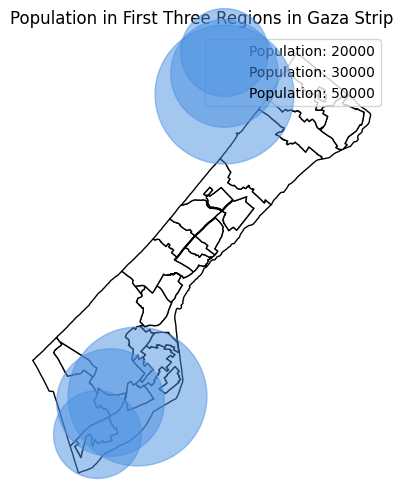

In [41]:
populations = [50000, 20000, 30000]
populations.sort()

regions_subset = gaza_regions.head(3)

fig, ax = plt.subplots(figsize=(10, 6))
gaza_regions.plot(column='NAME', legend=True, ax=ax, color='white', edgecolor='black')

for idx, row in regions_subset.iterrows():
    size = populations[idx] / 5
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=size, alpha=0.5, color = '#4A90E2',label=f'Population: {populations[idx]}')

plt.title('Population in First Three Regions in Gaza Strip')
ax.legend()
ax.set_axis_off()

plt.show()


#### Static Plots for the number of interactions

In [ ]:
hero_names = ["saleh", "moataz", "ahmed", "bysan", "Total"]
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Click on legend entries to mute the corresponding lines')
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(AutoDateLocator())

for df, name, color in zip(dfs, hero_names, colors):
    df['date'] = pd.to_datetime(df['date'])
    ax.plot(df['date'], df['sum'], label=name, color=color, linewidth=2, alpha=0.8)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()


In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
for df, name, color in zip(dfs, hero_names, colors):
    df['date'] = pd.to_datetime(df['date'])
    fig.add_trace(go.Scatter(x=df['date'], y=df['sum'], mode='lines', name=name, line=dict(color=color)))

fig.update_layout(title='Click on legend entries to mute the corresponding lines', showlegend=True)
fig.show()

#### Another plot for the interactions on social media with other background and colors

In [ ]:
fig = go.Figure()
traces = []
annotations = []

# Iterate through crisis periods
crisis_periods = [(pd.to_datetime('2023-11-24'), "Periodic ceasefire"), (pd.to_datetime('2023-11-29'), "Return of the War")]
for date, comment in crisis_periods:
    for df in dfs:
        if date in df['date'].values:
            filtered_df = df[df['date'] >= '2023-10-07']  # Filtering data from October 7, 2023
            if date in filtered_df['date'].values:
                y_value = filtered_df.loc[filtered_df['date'] == date, 'sum'].values
                if len(y_value) > 0:
                    y_value = y_value[0]
                    annotation = dict(x=date, y=y_value,
                                      text=comment, showarrow=True, arrowhead=1, arrowwidth=2, arrowcolor='black',
                                      xshift=5, yshift=5, font=dict(size=8), name=comment)
                    annotations.append(annotation)
                break 

# Plot lines and store them with annotations
colors = ['blue', 'green', 'red', 'purple']
for idx, df in enumerate(dfs):
    filtered_df = df[df['date'] >= '2023-10-07']
    trace = go.Scatter(x=filtered_df['date'], y=filtered_df['sum'], mode='lines', name=f'hero {stock_names[idx]}', visible=False, line=dict(color=colors[idx]))
    traces.append(trace)
    fig.add_trace(trace)

# Update layout
fig.update_layout(
    title='Social Media interactions during war in Gaza',
    xaxis=dict(title='Date', showgrid=False, tickangle=-45, tickformat="%Y-%m-%d"),
    yaxis=dict(title='Total interaction (in thousands)'),
    paper_bgcolor='rgb(210,180,140)',
    plot_bgcolor='rgba(255,255,255,0.95)',
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [True if i == idx else False for i in range(len(traces))]},
                          {"annotations": [a if i == idx else {} for i, a in enumerate(annotations)]}],
                    label=f'Hero {stock_names[idx]}',
                    method="update"
                ) for idx in range(len(traces))
            ] + [
                dict(
                    args=[{"visible": [True] * len(traces),
                           "annotations": annotations}],
                    label="All Heroes",
                    method="update"
                )
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.1, 
            xanchor="right",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Add shaded area for the crisis period (2008)
fig.add_shape(
    type="rect",
    x0='2023-11-24', 
    x1='2023-11-29', 
    y0=0,
    y1=dfs[0]['sum'].max() if len(dfs) > 0 else 0, 
    fillcolor="rgba(135,206,250,0.3)", 
    line=dict(width=0),
    layer="below"
)

# Add annotation for the crisis period
for annotation in annotations:
    fig.add_annotation(**annotation)

fig.show()
